# BUREAU

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
bureau = pd.read_csv('bureau.csv')

## INFORMASI AWAL

In [4]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [6]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = bureau.select_dtypes(include=['number']).columns
kolom_kategorikal = bureau.select_dtypes(include=['object']).columns

## EDA KOLOM NUMERIKAL

### Describe

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
bureau[kolom_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.00,278214.93,102938.56,100001.00,188866.75,278055.00,367426.00,456255.00
SK_ID_BUREAU,1716428.00,5924434.49,532265.73,5000000.00,5463953.75,5926303.50,6385681.25,6843457.00
DAYS_CREDIT,1716428.00,-1142.11,795.16,-2922.00,-1666.00,-987.00,-474.00,0.00
CREDIT_DAY_OVERDUE,1716428.00,0.82,36.54,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,1610875.00,510.52,4994.22,-42060.00,-1138.00,-330.00,474.00,31199.00
DAYS_ENDDATE_FACT,1082775.00,-1017.44,714.01,-42023.00,-1489.00,-897.00,-425.00,0.00
AMT_CREDIT_MAX_OVERDUE,591940.00,3825.42,206031.61,0.00,0.00,0.00,0.00,115987185.00
CNT_CREDIT_PROLONG,1716428.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,1716415.00,354994.59,1149811.34,0.00,51300.00,125518.50,315000.00,585000000.00
AMT_CREDIT_SUM_DEBT,1458759.00,137085.12,677401.13,-4705600.32,0.00,0.00,40153.50,170100000.00


### Boxplot

C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_20492\910057739.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Loca

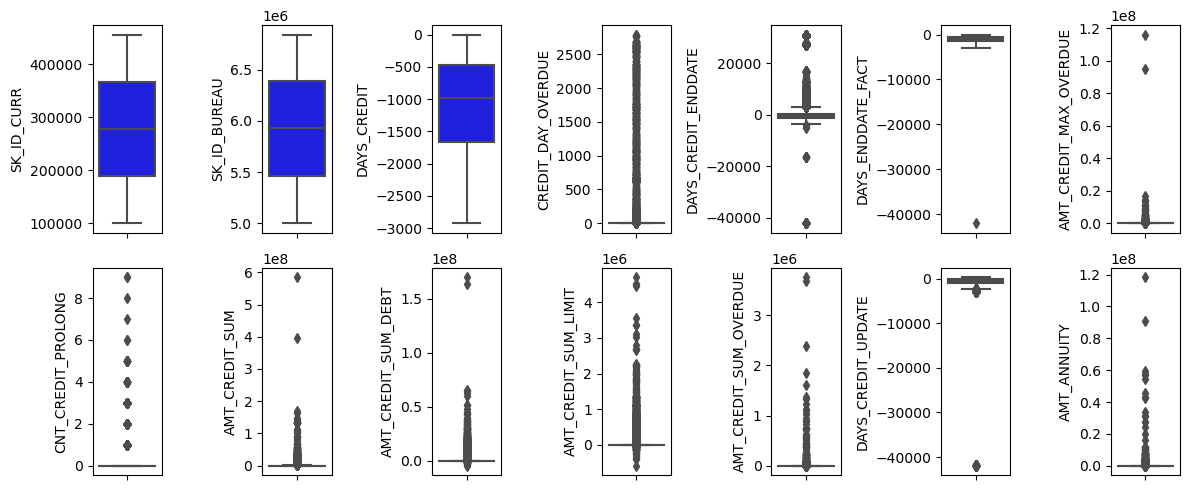

In [9]:
plt.figure(figsize=(12, 5))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=bureau[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

### Displot

### Heatmap

<Axes: >

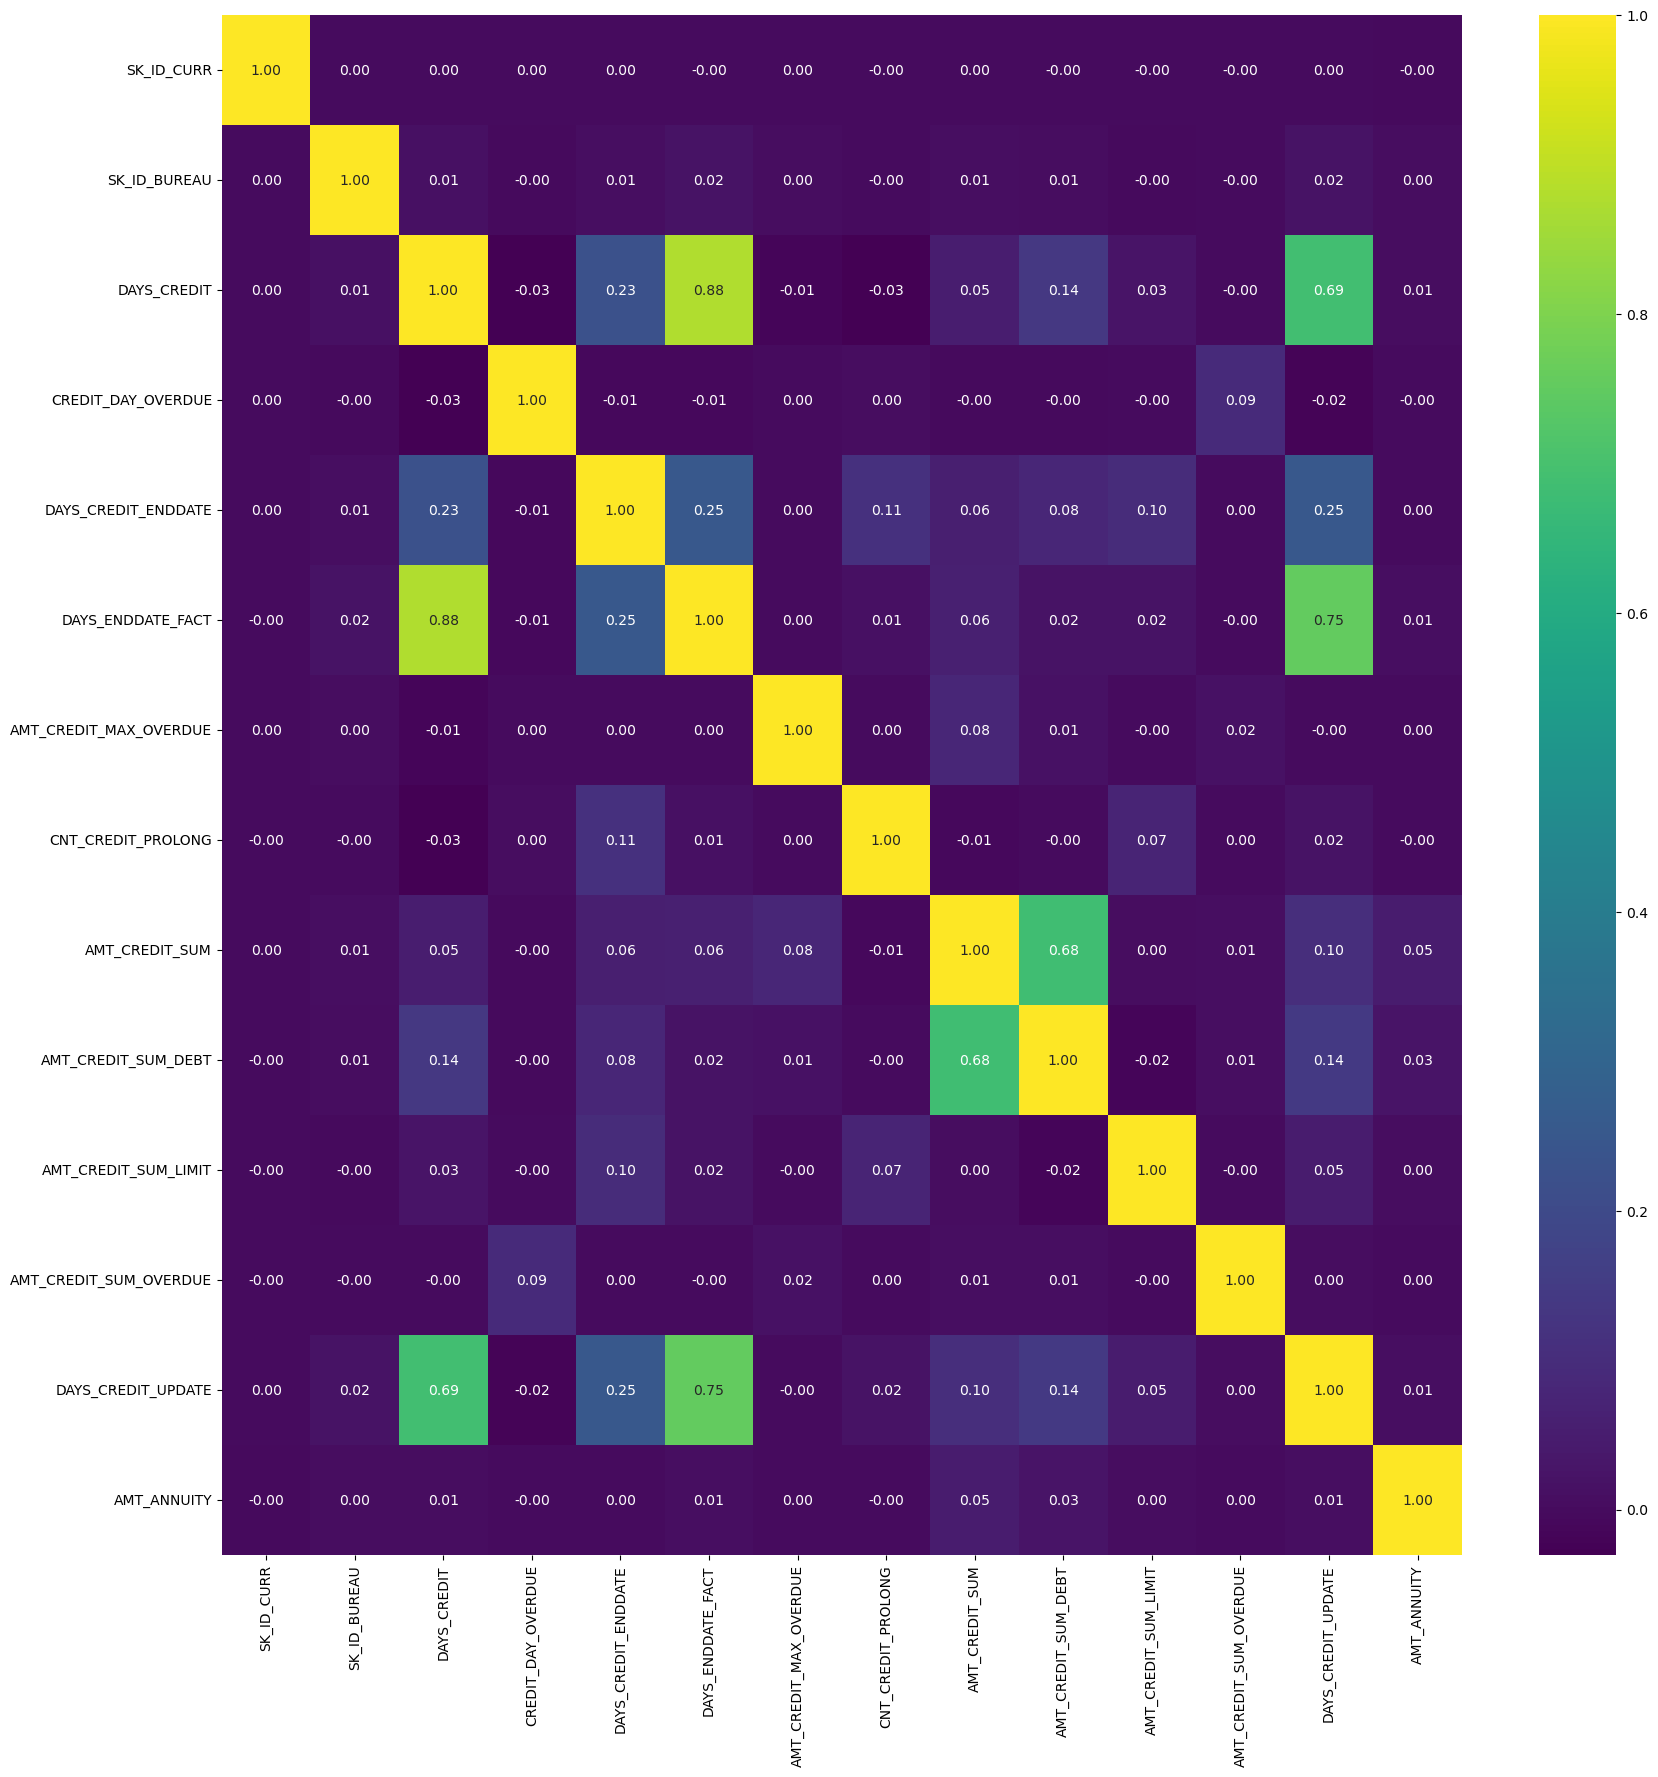

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(bureau[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

## EDA KOLOM KATEGORIKAL

### Describe

In [11]:
bureau[kolom_kategorikal].describe().transpose()

,count,unique,top,freq
CREDIT_ACTIVE,1716428,4,Closed,1079273
CREDIT_CURRENCY,1716428,4,currency 1,1715020
CREDIT_TYPE,1716428,15,Consumer credit,1251615


### Nilai Unik

In [12]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(bureau[col].value_counts())
    print()

Value count kolom CREDIT_ACTIVE:
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

Value count kolom CREDIT_CURRENCY:
CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

Value count kolom CREDIT_TYPE:
CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase

### Barchart Distribusi Kategorikal

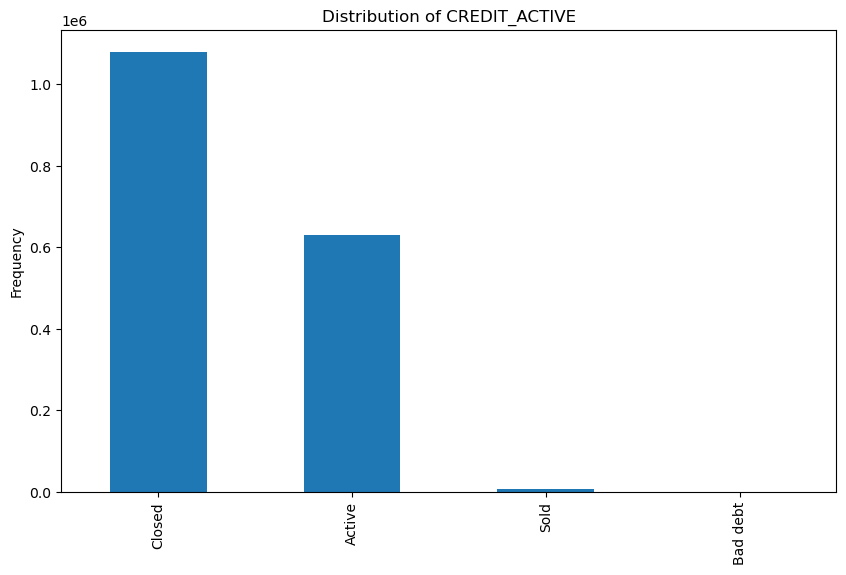

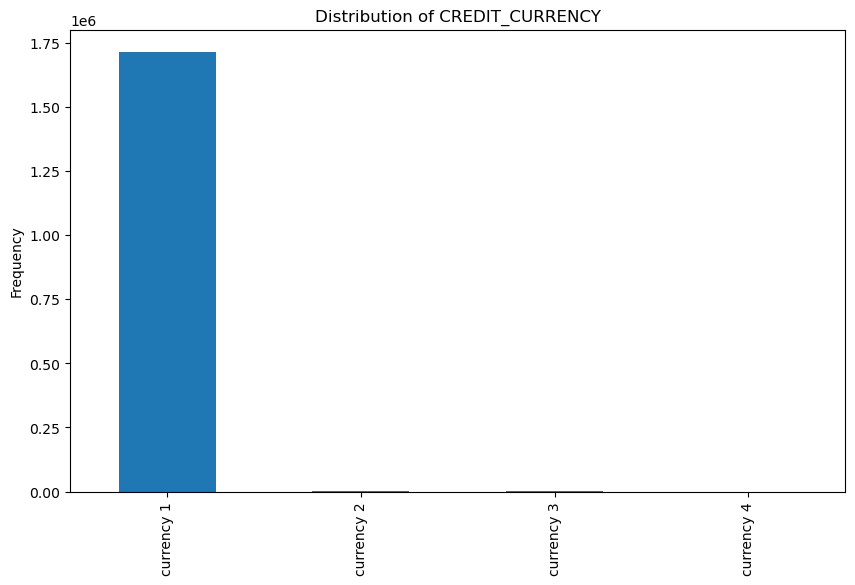

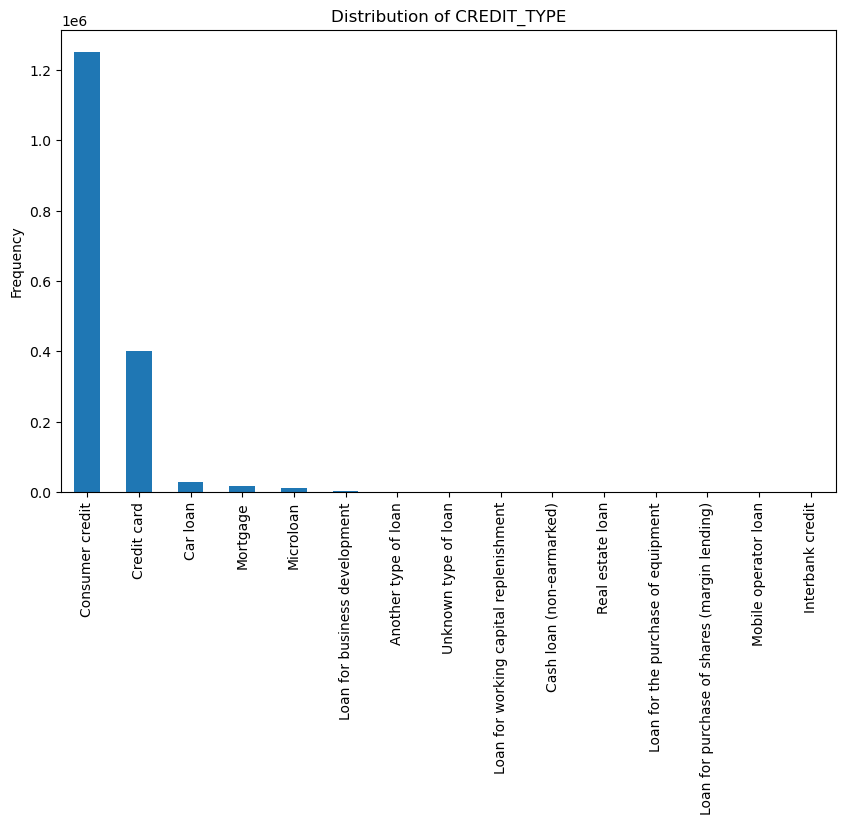

In [13]:
# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    bureau[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

# DATA PREPROCESSING

## MISSING VALUES

### Cek Missing Values

In [14]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = bureau.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(bureau)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                        Jumlah Missing Values  Persentase Missing Values (%)
DAYS_CREDIT_ENDDATE                    105553                           6.15
DAYS_ENDDATE_FACT                      633653                          36.92
AMT_CREDIT_MAX_OVERDUE                1124488                          65.51
AMT_CREDIT_SUM                             13                           0.00
AMT_CREDIT_SUM_DEBT                    257669                          15.01
AMT_CREDIT_SUM_LIMIT                   591780                          34.48
AMT_ANNUITY                           1226791                          71.47


### Penanganan Missing Values

In [15]:
kolom_dihapus = ['DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']

bureau.drop(columns=kolom_dihapus, inplace=True)

In [16]:
bureau = bureau.drop(columns=['CREDIT_CURRENCY'])

Keputusan menghapus Kolom tersebut karena memiliki nilai Missing Values yang besar.  
untuk kolom DAYS_ENDDATE_FACT juga redundan dengan kolom DAYS_CREDIT

In [17]:
# Hapus baris yang nilai Missing Valuesnya < 10%
threshold = 0.1  # 10%
columns_with_few_missing = bureau.columns[bureau.isnull().mean() < threshold]

# Hapus baris yang memiliki nilai null di kolom tersebut
bureau = bureau.dropna(subset=columns_with_few_missing)

In [18]:
# Mengganti nilai NaN dengan median
bureau[['AMT_CREDIT_SUM_DEBT']] = bureau[['AMT_CREDIT_SUM_DEBT']].apply(lambda x: x.fillna(x.median()))

### Ceck Kembali

In [19]:
bureau.isna().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

# LEFT JOIN BUREAU DAN BUREAU_BALANCE

In [20]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [21]:
bureau_join = pd.merge(
    bureau, 
    bureau_balance, 
    on='SK_ID_BUREAU',      # Bergabung berdasarkan kolom SK_ID_BUREAU
    how='left',             # Left join (bureau di kiri)
    suffixes=('', '_BALANCE')  # Tambahkan suffix untuk kolom yang sama selain SK_ID_BUREAU
)

In [22]:
bureau_join.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,215354,5714462,Closed,-497,0,-153.00,0,91323.00,0.00,0.00,Consumer credit,-131,NaN,NaN
1,215354,5714463,Active,-208,0,1075.00,0,225000.00,171342.00,0.00,Credit card,-20,NaN,NaN
2,215354,5714464,Active,-203,0,528.00,0,464323.50,0.00,0.00,Consumer credit,-16,NaN,NaN
3,215354,5714466,Active,-629,0,1197.00,0,2700000.00,0.00,0.00,Consumer credit,-21,NaN,NaN
4,215354,5714467,Active,-273,0,27460.00,0,180000.00,71017.38,0.00,Credit card,-31,NaN,NaN


In [23]:
bureau_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23889242 entries, 0 to 23889241
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   DAYS_CREDIT             int64  
 4   CREDIT_DAY_OVERDUE      int64  
 5   DAYS_CREDIT_ENDDATE     float64
 6   CNT_CREDIT_PROLONG      int64  
 7   AMT_CREDIT_SUM          float64
 8   AMT_CREDIT_SUM_DEBT     float64
 9   AMT_CREDIT_SUM_OVERDUE  float64
 10  CREDIT_TYPE             object 
 11  DAYS_CREDIT_UPDATE      int64  
 12  MONTHS_BALANCE          float64
 13  STATUS                  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.5+ GB


In [24]:
kolom_kategorikal = bureau_join.select_dtypes(include=['object']).columns

for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(bureau_join[col].value_counts())
    print()

Value count kolom CREDIT_ACTIVE:
CREDIT_ACTIVE
Closed      18617163
Active       5156146
Sold          115816
Bad debt         117
Name: count, dtype: int64

Value count kolom CREDIT_TYPE:
CREDIT_TYPE
Consumer credit                                 18872079
Credit card                                      4217923
Car loan                                          456378
Mortgage                                          245896
Loan for business development                      40583
Microloan                                          30859
Unknown type of loan                               13462
Another type of loan                                5774
Loan for working capital replenishment              4246
Cash loan (non-earmarked)                           1445
Loan for the purchase of equipment                   302
Real estate loan                                     231
Loan for purchase of shares (margin lending)          37
Mobile operator loan                                  26
I

## MENGGESER NILAI NEGATIF

In [25]:
bureau_join.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,23889242.00,277966.71,102901.44,100001.00,188741.00,277621.00,367316.00,456255.00
SK_ID_BUREAU,23889242.00,6028464.68,497143.42,5000000.00,5709029.00,6063733.00,6431541.00,6843457.00
DAYS_CREDIT,23889242.00,-1595.45,762.83,-2922.00,-2287.00,-1557.00,-989.00,0.00
CREDIT_DAY_OVERDUE,23889242.00,0.89,38.93,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,23889242.00,6.50,4832.37,-42060.00,-1651.00,-890.00,-38.00,31199.00
CNT_CREDIT_PROLONG,23889242.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,23889242.00,340877.04,1492563.97,0.00,49369.50,117000.00,292500.00,585000000.00
AMT_CREDIT_SUM_DEBT,23889242.00,72481.39,560023.49,-4705600.32,0.00,0.00,0.00,170100000.00
AMT_CREDIT_SUM_OVERDUE,23889242.00,15.34,2951.07,0.00,0.00,0.00,0.00,3756681.00
DAYS_CREDIT_UPDATE,23889242.00,-848.27,712.18,-41947.00,-1229.00,-784.00,-214.00,372.00


In [26]:
# Mencari nilai minimum pada kolom
min_value = bureau_join['DAYS_CREDIT'].min()
min_value2 = bureau_join['DAYS_CREDIT_ENDDATE'].min()
min_value3 = bureau_join['AMT_CREDIT_SUM_DEBT'].min()
min_value4 = bureau_join['DAYS_CREDIT_UPDATE'].min()
min_value5 = bureau_join['DAYS_CREDIT'].min()

# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    bureau_join['DAYS_CREDIT'] = bureau_join['DAYS_CREDIT'] + abs(min_value)

if min_value2 < 0:
    bureau_join['DAYS_CREDIT_ENDDATE'] = bureau_join['DAYS_CREDIT_ENDDATE'] + abs(min_value2)
    
if min_value3 < 0:
    bureau_join['AMT_CREDIT_SUM_DEBT'] = bureau_join['AMT_CREDIT_SUM_DEBT'] + abs(min_value3)
    
if min_value4 < 0:
    bureau_join['DAYS_CREDIT_UPDATE'] = bureau_join['DAYS_CREDIT_UPDATE'] + abs(min_value4)
    
if min_value5 < 0:
    bureau_join['MONTHS_BALANCE'] = bureau_join['MONTHS_BALANCE'] + abs(min_value5)

In [27]:
bureau_join.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,23889242.00,277966.71,102901.44,100001.00,188741.00,277621.00,367316.00,456255.00
SK_ID_BUREAU,23889242.00,6028464.68,497143.42,5000000.00,5709029.00,6063733.00,6431541.00,6843457.00
DAYS_CREDIT,23889242.00,1326.55,762.83,0.00,635.00,1365.00,1933.00,2922.00
CREDIT_DAY_OVERDUE,23889242.00,0.89,38.93,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,23889242.00,42066.50,4832.37,0.00,40409.00,41170.00,42022.00,73259.00
CNT_CREDIT_PROLONG,23889242.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,23889242.00,340877.04,1492563.97,0.00,49369.50,117000.00,292500.00,585000000.00
AMT_CREDIT_SUM_DEBT,23889242.00,4778081.71,560023.49,0.00,4705600.32,4705600.32,4705600.32,174805600.32
AMT_CREDIT_SUM_OVERDUE,23889242.00,15.34,2951.07,0.00,0.00,0.00,0.00,3756681.00
DAYS_CREDIT_UPDATE,23889242.00,41098.73,712.18,0.00,40718.00,41163.00,41733.00,42319.00


## LOG TRANSFORMATION

In [28]:
# Kolom ini dihapus karena tidak akan digunakan kembali
bureau_join = bureau_join.drop(columns=['SK_ID_BUREAU'])

In [29]:
# 1. Identifikasi kolom yang tidak akan di-transformasi
# SK_ID_CURR tidak diubah, dan kolom boolean juga tidak diubah
exclude_columns = ['SK_ID_CURR'] + list(bureau_join.select_dtypes(include=['bool']).columns)

# 2. Identifikasi kolom numerik yang akan di-transformasi (kecuali yang ada di exclude_columns)
numeric_columns = bureau_join.select_dtypes(include=[np.number]).columns
columns_to_transform = [col for col in numeric_columns if col not in exclude_columns]

# 3. Terapkan log transformation pada kolom-kolom yang sudah diidentifikasi
# Tambahkan 1 untuk menghindari log(0)
bureau_join[columns_to_transform] = bureau_join[columns_to_transform].apply(lambda x: np.log1p(x))

## ENCODE

In [30]:
# One Hot Encoding
bureau_join = pd.get_dummies(bureau_join, columns=['CREDIT_ACTIVE'])

# Label Encoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
bureau_join['STATUS_ENCODE'] = encoder.fit_transform(bureau_join[['STATUS']])

In [31]:
# Frequency Encoding
# Hitung frekuensi kemunculan untuk setiap kategori di kolom CREDIT_ACTIVE
freq_encoding = bureau_join['CREDIT_TYPE'].value_counts()

# Map frekuensi tersebut ke dalam kolom baru
bureau_join['CREDIT_TYPE_ENCODE'] = bureau_join['CREDIT_TYPE'].map(freq_encoding)

In [32]:
bureau_join = bureau_join.drop(columns=['STATUS'])
bureau_join = bureau_join.drop(columns=['CREDIT_TYPE'])

In [33]:
bureau_join.head(5)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,STATUS_ENCODE,CREDIT_TYPE_ENCODE
0,215354,7.79,0.00,10.64,0.00,11.42,15.36,0.00,10.64,NaN,False,False,True,False,NaN,18872079
1,215354,7.91,0.00,10.67,0.00,12.32,15.40,0.00,10.64,NaN,True,False,False,False,NaN,4217923
2,215354,7.91,0.00,10.66,0.00,13.05,15.36,0.00,10.64,NaN,True,False,False,False,NaN,18872079
3,215354,7.74,0.00,10.67,0.00,14.81,15.36,0.00,10.64,NaN,True,False,False,False,NaN,18872079
4,215354,7.88,0.00,11.15,0.00,12.10,15.38,0.00,10.64,NaN,True,False,False,False,NaN,4217923


In [34]:
bureau_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23889242 entries, 0 to 23889241
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   DAYS_CREDIT             float64
 2   CREDIT_DAY_OVERDUE      float64
 3   DAYS_CREDIT_ENDDATE     float64
 4   CNT_CREDIT_PROLONG      float64
 5   AMT_CREDIT_SUM          float64
 6   AMT_CREDIT_SUM_DEBT     float64
 7   AMT_CREDIT_SUM_OVERDUE  float64
 8   DAYS_CREDIT_UPDATE      float64
 9   MONTHS_BALANCE          float64
 10  CREDIT_ACTIVE_Active    bool   
 11  CREDIT_ACTIVE_Bad debt  bool   
 12  CREDIT_ACTIVE_Closed    bool   
 13  CREDIT_ACTIVE_Sold      bool   
 14  STATUS_ENCODE           float64
 15  CREDIT_TYPE_ENCODE      int64  
dtypes: bool(4), float64(10), int64(2)
memory usage: 2.2 GB


## SCALING

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom yang bertipe boolean
boolean_columns = bureau_join.select_dtypes(include=['bool']).columns

# Tambahkan kolom SK_ID_CURR ke daftar kolom yang akan dikecualikan
exclude_columns = ['SK_ID_CURR'] + list(boolean_columns)

# Pilih kolom yang bukan boolean dan bukan SK_ID_CURR
scaling_columns = bureau_join.columns.difference(exclude_columns)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom yang dipilih
bureau_join[scaling_columns] = scaler.fit_transform(bureau_join[scaling_columns])

In [37]:
# Mengidentifikasi kolom yang bertipe boolean
boolean_cols = bureau_join.select_dtypes(include='bool').columns

# Mengubah nilai boolean menjadi 1 untuk True dan 0 untuk False hanya pada kolom boolean
bureau_join[boolean_cols] = bureau_join[boolean_cols].astype(int)

In [38]:
bureau_join.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,STATUS_ENCODE,CREDIT_TYPE_ENCODE
0,215354,0.98,0.00,0.95,0.00,0.57,0.81,0.00,1.00,NaN,0,0,1,0,NaN,1.00
1,215354,0.99,0.00,0.95,0.00,0.61,0.81,0.00,1.00,NaN,1,0,0,0,NaN,0.22
2,215354,0.99,0.00,0.95,0.00,0.65,0.81,0.00,1.00,NaN,1,0,0,0,NaN,1.00
3,215354,0.97,0.00,0.95,0.00,0.73,0.81,0.00,1.00,NaN,1,0,0,0,NaN,1.00
4,215354,0.99,0.00,1.00,0.00,0.60,0.81,0.00,1.00,NaN,1,0,0,0,NaN,0.22


## AGREGASSI DATASET

In [39]:
# Pertama, kelompokkan berdasarkan SK_ID_CURR dan hitung rata-rata untuk kolom lainnya
agg_df = bureau_join.groupby('SK_ID_CURR').mean().reset_index()

# Selanjutnya, hitung berapa kali setiap SK_ID_CURR muncul dan tambahkan sebagai kolom baru
agg_df['FREQ_BUREAU'] = bureau_join.groupby('SK_ID_CURR').size().values

In [41]:
agg_df.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,STATUS_ENCODE,CREDIT_TYPE_ENCODE,FREQ_BUREAU
0,100001,0.94,0.00,0.95,0.00,0.59,0.81,0.00,1.00,0.83,0.19,0.00,0.81,0.00,0.72,1.00,172
1,100002,0.94,0.00,0.95,0.00,0.56,0.81,0.00,1.00,0.71,0.18,0.00,0.82,0.00,0.28,0.67,90
2,100003,0.89,0.00,0.95,0.00,0.58,0.81,0.00,1.00,NaN,0.25,0.00,0.75,0.00,NaN,0.61,4
3,100004,0.95,0.00,0.95,0.00,0.57,0.81,0.00,1.00,NaN,0.00,0.00,1.00,0.00,NaN,1.00,2
4,100005,0.99,0.00,0.95,0.00,0.57,0.81,0.00,1.00,0.96,0.38,0.00,0.62,0.00,0.30,0.52,21


In [42]:
# Lakukan scaling hanya pada kolom FREQ_BUREAU
agg_df['FREQ_BUREAU_scaled'] = scaler.fit_transform(agg_df[['FREQ_BUREAU']])

In [44]:
agg_df = agg_df.drop(columns=['FREQ_BUREAU'])

In [45]:
agg_df.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,STATUS_ENCODE,CREDIT_TYPE_ENCODE,FREQ_BUREAU_scaled
0,100001,0.94,0.00,0.95,0.00,0.59,0.81,0.00,1.00,0.83,0.19,0.00,0.81,0.00,0.72,1.00,0.06
1,100002,0.94,0.00,0.95,0.00,0.56,0.81,0.00,1.00,0.71,0.18,0.00,0.82,0.00,0.28,0.67,0.03
2,100003,0.89,0.00,0.95,0.00,0.58,0.81,0.00,1.00,NaN,0.25,0.00,0.75,0.00,NaN,0.61,0.00
3,100004,0.95,0.00,0.95,0.00,0.57,0.81,0.00,1.00,NaN,0.00,0.00,1.00,0.00,NaN,1.00,0.00
4,100005,0.99,0.00,0.95,0.00,0.57,0.81,0.00,1.00,0.96,0.38,0.00,0.62,0.00,0.30,0.52,0.01


# SIMPAN DATASET KE CSV

In [46]:
# Simpan DataFrame ke file CSV
agg_df.to_csv('bureau_join_new.csv', index=False)